<center>Name:Quratulain<br>
Email:QuratulainkhanAIML1@hotmail.com<br>
Github:QuratulainkhanAIML1<br>
Title:Logistic regression on titanic dataset by q</center>

Install Libraries

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib.pyplot
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




Preprocessing data

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [5]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [7]:
titanic = titanic.dropna(subset=['age','deck','embark_town'])

In [8]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
msa=titanic['age'].mean()
titanic['age'].fillna(msa,inplace=True)
titanic['age'].isnull().sum()

C:\Users\qurat\AppData\Local\Temp\ipykernel_11888\903099327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(msa,inplace=True)
C:\Users\qurat\AppData\Local\Temp\ipykernel_11888\903099327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age'].fillna(msa,inplace=True)


np.int64(0)

In [10]:
FareMedian=titanic['fare'].median()
titanic['fare'].fillna(FareMedian, inplace=True)
titanic['fare'].isnull().sum()

C:\Users\qurat\AppData\Local\Temp\ipykernel_11888\2111384199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['fare'].fillna(FareMedian, inplace=True)
C:\Users\qurat\AppData\Local\Temp\ipykernel_11888\2111384199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['fare'].fillna(FareMedian, inplace=True)


np.int64(0)

In [11]:
titanic['age']=titanic['age'].apply(lambda x: x if x < 100 else msa)
titanic['age']=titanic['age'].apply(lambda x: x if x > 18 else msa)
titanic['age']

C:\Users\qurat\AppData\Local\Temp\ipykernel_11888\2847249190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age']=titanic['age'].apply(lambda x: x if x < 100 else msa)
C:\Users\qurat\AppData\Local\Temp\ipykernel_11888\2847249190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age']=titanic['age'].apply(lambda x: x if x > 18 else msa)


1      38.000000
3      35.000000
6      54.000000
10     35.623187
11     58.000000
         ...    
871    47.000000
872    33.000000
879    56.000000
887    19.000000
889    26.000000
Name: age, Length: 182, dtype: float64

In [12]:
titanic['fare']=titanic['fare'].apply(lambda x: x if x < 20 else msa)
titanic['fare']=titanic['fare'].apply(lambda x: x if x > 40 else msa)
titanic['fare']

C:\Users\qurat\AppData\Local\Temp\ipykernel_11888\3460526483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['fare']=titanic['fare'].apply(lambda x: x if x < 20 else msa)
C:\Users\qurat\AppData\Local\Temp\ipykernel_11888\3460526483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['fare']=titanic['fare'].apply(lambda x: x if x > 40 else msa)


1      35.623187
3      35.623187
6      35.623187
10     35.623187
11     35.623187
         ...    
871    35.623187
872    35.623187
879    35.623187
887    35.623187
889    35.623187
Name: fare, Length: 182, dtype: float64

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [14]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02
mean,0.675824,1.192308,38.806776,0.467033,0.478022,3.562319e+01
std,0.469357,0.516411,12.198909,0.645007,0.755869,7.125029e-15
min,0.000000,1.000000,19.000000,0.000000,0.000000,3.562319e+01
25%,0.000000,1.000000,30.250000,0.000000,0.000000,3.562319e+01
50%,1.000000,1.000000,36.000000,0.000000,0.000000,3.562319e+01
75%,1.000000,1.000000,47.750000,1.000000,1.000000,3.562319e+01
max,1.000000,3.000000,80.000000,3.000000,4.000000,3.562319e+01


In [15]:
X = titanic[['adult_male','pclass']]  
Y = titanic['class']   

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X,Y)

LogisticRegression()

In [18]:
Y_pred = model.predict(X)
Y_pred 

array(['First', 'First', 'First', 'Third', 'First', 'Second', 'First',
       'First', 'First', 'First', 'First', 'Second', 'Third', 'First',
       'First', 'First', 'First', 'First', 'First', 'First', 'Second',
       'First', 'First', 'First', 'First', 'Second', 'First', 'First',
       'First', 'First', 'Second', 'Second', 'First', 'First', 'Third',
       'First', 'First', 'First', 'First', 'First', 'First', 'First',
       'Third', 'First', 'First', 'First', 'First', 'First', 'First',
       'First', 'First', 'First', 'Second', 'First', 'First', 'First',
       'First', 'First', 'First', 'First', 'First', 'First', 'First',
       'Second', 'First', 'First', 'First', 'First', 'First', 'Second',
       'First', 'Second', 'First', 'First', 'First', 'First', 'First',
       'First', 'First', 'Third', 'First', 'Third', 'First', 'First',
       'First', 'First', 'First', 'First', 'First', 'First', 'First',
       'First', 'First', 'Second', 'First', 'First', 'First', 'First',
       'F

Evaluation Metrices

In [19]:
from sklearn.metrics import accuracy_score 
print("Accuracy:", accuracy_score(Y, Y_pred))

Accuracy: 1.0


In [20]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(Y, Y_pred))


Classification Report:
               precision    recall  f1-score   support

       First       1.00      1.00      1.00       157
      Second       1.00      1.00      1.00        15
       Third       1.00      1.00      1.00        10

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [21]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(Y, Y_pred))


Confusion Matrix:
 [[157   0   0]
 [  0  15   0]
 [  0   0  10]]


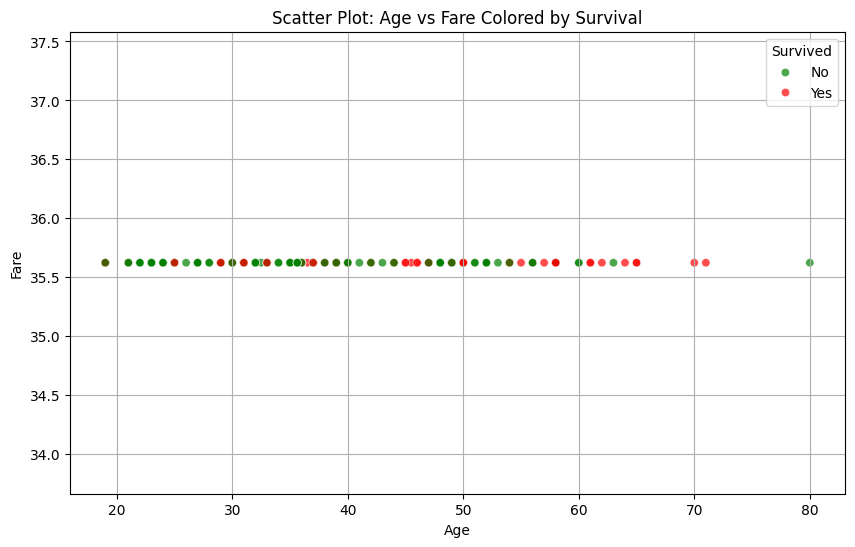

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic,x='age', y='fare', hue='survived', palette={0: 'red', 1: 'green'}, alpha=0.7)
plt.title('Scatter Plot: Age vs Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

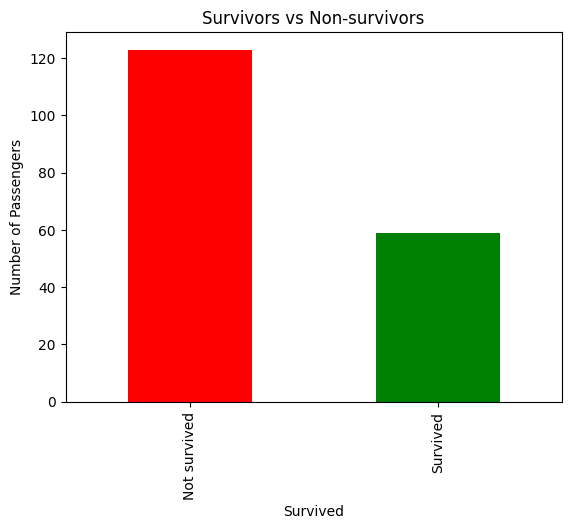

In [24]:
survival_counts=titanic['survived'].value_counts()
survival_counts.plot(kind='bar',color=['red','green'])
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survivors vs Non-survivors')
#Adjust xtickets to show labels
plt.xticks(ticks=[0,1],labels=['Not survived','Survived'])
plt.show()